In [14]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
data  = pd.read_csv('articles.csv',encoding = 'latin-1')
data.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


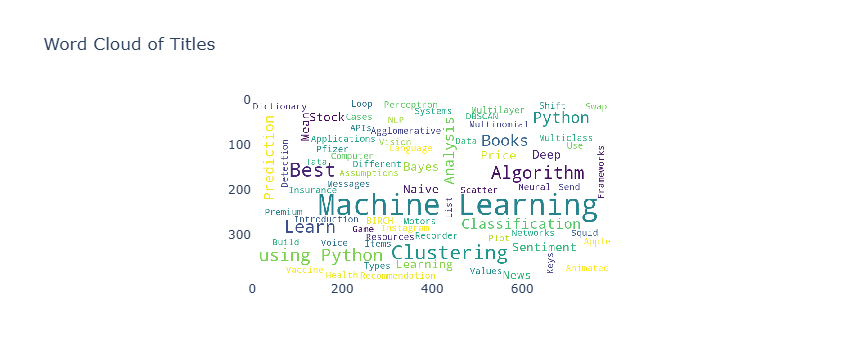

In [11]:
titles_text = ' '.join(data['Title'])

wordcloud = WordCloud(width = 800,height = 400,background_color='white').generate(titles_text)

fig = px.imshow(wordcloud,title = 'Word Cloud of Titles')
fig.update_layout(showlegend = False)
fig.show()

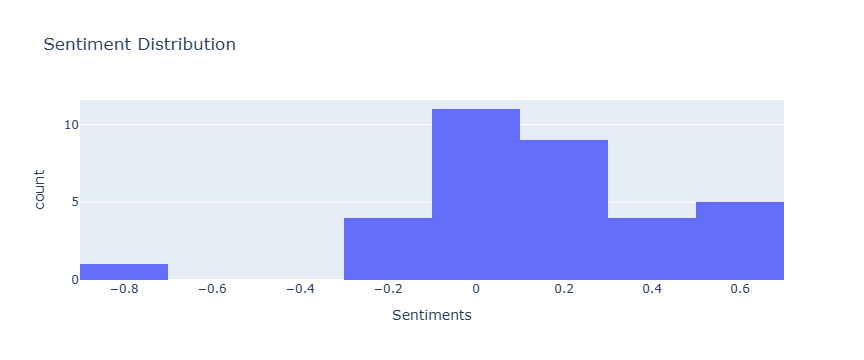

In [12]:
# Sentiment Analysis
data['Sentiments'] = data['Article'].apply(lambda x : TextBlob(x).sentiment.polarity)
# Sentiment Distribution
fig = px.histogram(data,x='Sentiments',title = 'Sentiment Distribution')
fig.show()

In [19]:
!python -m spacy download en

C:\msys64\mingw64\bin\python.exe: No module named spacy


In [16]:
# NamedEntryRecognition

nlp = spacy.load('en_core_web_sm')
def extract_named_entities(text):
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
    return dict(entities)

data['Named_Entities'] = data['Article'].apply(extract_named_entities)

# Visualize NER
entity_counts = Counter(entity for entities in data['Named_Entities'] for entity in entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index').reset_index()
entity_df.columns = ['Entity', 'Count']

fig = px.bar(entity_df.head(10), x='Entity', y='Count', title='Top 10 Named Entities')
fig.show()

C:\msys64\mingw64\bin\python.exe: No module named spacy


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

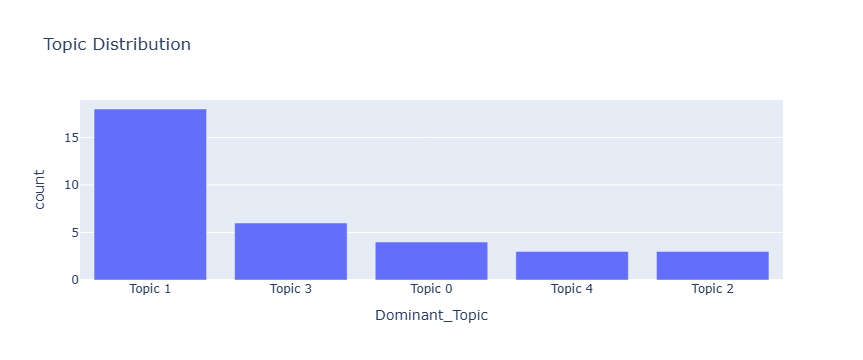

In [22]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(data['Article'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

# Visualize topics
topic_names = ["Topic " + str(i) for i in range(lda_model.n_components)]
data['Dominant_Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)]

# Reset Index and Renaming columns
df = data['Dominant_Topic'].value_counts().reset_index()
df.columns = ['Dominant_Topic', 'count']

# Create the bar plot
fig = px.bar(df, x='Dominant_Topic', y='count', title='Topic Distribution')
fig.show()
